# M/G/1 Mod & Sim

In [ ]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


λ	Utilization (ρ)	Avg. Response Time (R)	Avg. Waiting Time (W)
0.1	0.10		1.06 min			0.06 min
0.2	0.20		1.13 min			0.13 min
0.3	0.30		1.22 min			0.22 min
0.4	0.40		1.35 min			0.35 min
0.5	0.50		1.52 min			0.52 min
0.6	0.60		1.78 min			0.78 min
0.7	0.70		2.22 min			1.22 min
0.8	0.80		3.09 min			2.09 min
0.9	0.90		5.63 min			4.63 min


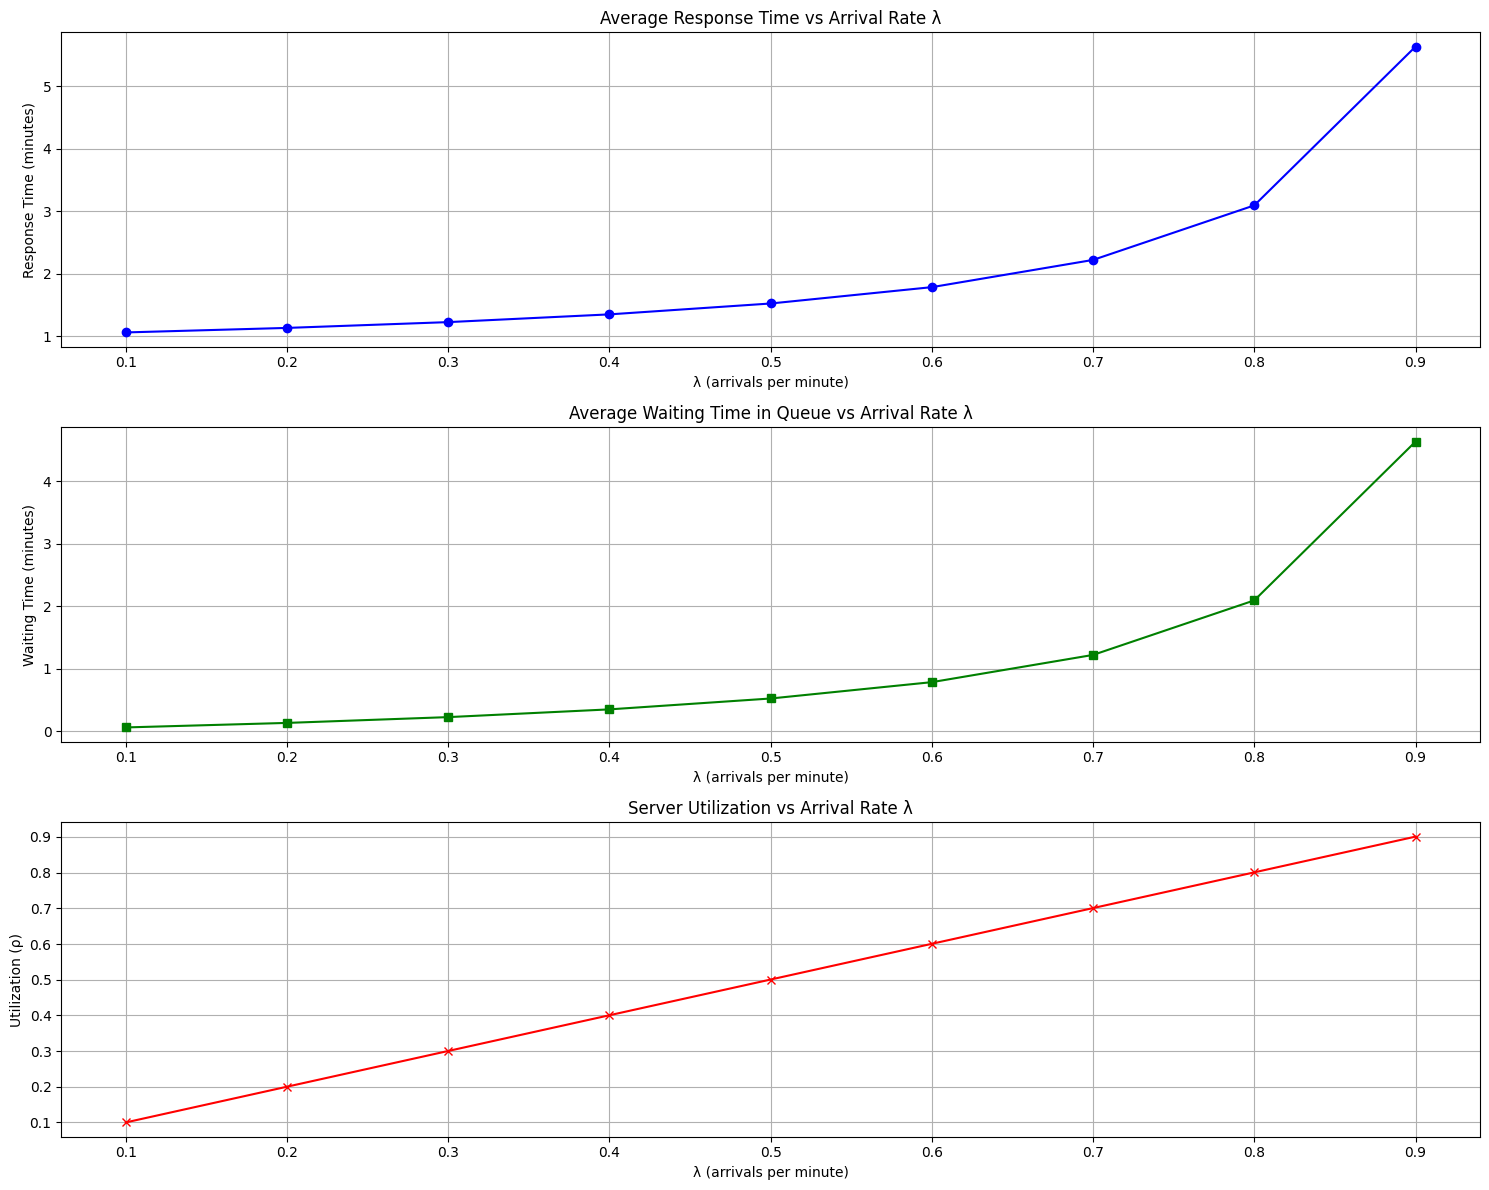

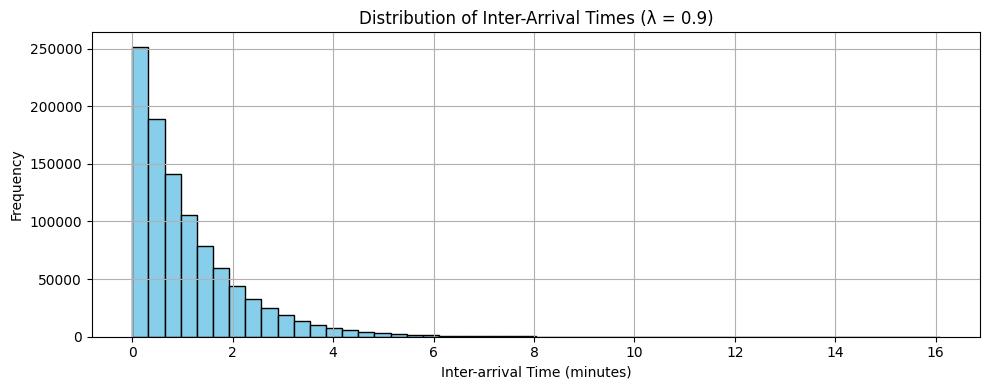

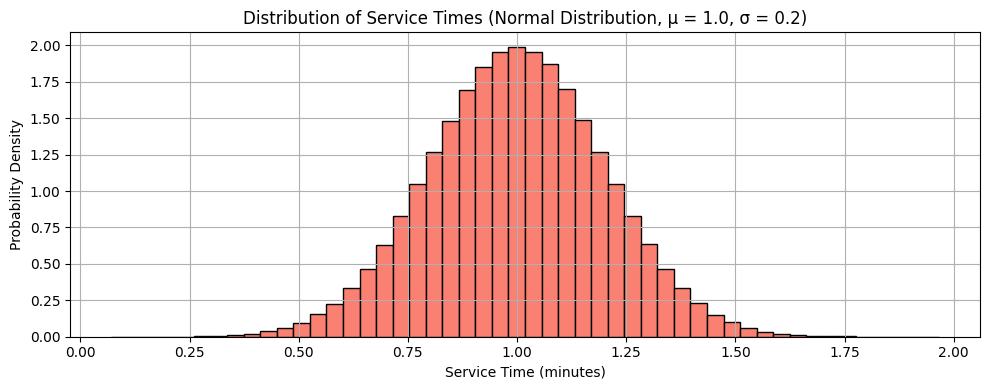

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_customers = 1_000_000
mu = 1.0  # Service rate (μ)
service_mean = 1.0  # minutes
service_std = 0.2  # minutes

# Arrival rates to test
lambdas = np.arange(0.1, 1.0, 0.1)

# Store results
mg1_results = {
    'lambda': [],
    'response_times': [],
    'waiting_times': [],
    'utilization': []
}

# Store last simulation's inter-arrival times for histogram
last_inter_arrival_times = None
last_lambda = None

# Simulation loop
for lam in lambdas:
    np.random.seed(42)  # Reproducibility

    U = np.random.rand(num_customers)
    inter_arrival_times = -np.log(U) / lam
    arrival_times = np.cumsum(inter_arrival_times)

    service_times = np.random.normal(loc=service_mean, scale=service_std, size=num_customers)
    service_times = np.clip(service_times, a_min=0.001, a_max=None)

    start_times = np.zeros(num_customers)
    end_times = np.zeros(num_customers)

    start_times[0] = arrival_times[0]
    end_times[0] = start_times[0] + service_times[0]

    for i in range(1, num_customers):
        start_times[i] = max(arrival_times[i], end_times[i - 1])
        end_times[i] = start_times[i] + service_times[i]

    response_times = end_times - arrival_times
    waiting_times = start_times - arrival_times
    utilization = np.sum(service_times) / end_times[-1]

    mg1_results['lambda'].append(lam)
    mg1_results['response_times'].append(np.mean(response_times))
    mg1_results['waiting_times'].append(np.mean(waiting_times))
    mg1_results['utilization'].append(utilization)

    # Save data from last simulation for histogram
    last_inter_arrival_times = inter_arrival_times
    last_lambda = lam

# Print result table
print("λ\tUtilization (ρ)\tAvg. Response Time (R)\tAvg. Waiting Time (W)")
for i in range(len(lambdas)):
    lam = mg1_results['lambda'][i]
    rho = mg1_results['utilization'][i]
    R = mg1_results['response_times'][i]
    W = mg1_results['waiting_times'][i]
    print(f"{lam:.1f}\t{rho:.2f}\t\t{R:.2f} min\t\t\t{W:.2f} min")

# Plot main results
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(mg1_results['lambda'], mg1_results['response_times'], label='Avg. Response Time (R)', marker='o', color='blue')
plt.title('Average Response Time vs Arrival Rate λ')
plt.xlabel('λ (arrivals per minute)')
plt.ylabel('Response Time (minutes)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(mg1_results['lambda'], mg1_results['waiting_times'], label='Avg. Waiting Time (W)', marker='s', color='green')
plt.title('Average Waiting Time in Queue vs Arrival Rate λ')
plt.xlabel('λ (arrivals per minute)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(mg1_results['lambda'], mg1_results['utilization'], label='Server Utilization (ρ)', marker='x', color='red')
plt.title('Server Utilization vs Arrival Rate λ')
plt.xlabel('λ (arrivals per minute)')
plt.ylabel('Utilization (ρ)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot histogram of inter-arrival times
plt.figure(figsize=(10, 4))
plt.hist(last_inter_arrival_times, bins=50, color='skyblue', edgecolor='black')
plt.title(f'Distribution of Inter-Arrival Times (λ = {last_lambda:.1f})')
plt.xlabel('Inter-arrival Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot histogram of service times
plt.figure(figsize=(10, 4))
plt.hist(service_times, bins=50, color='salmon', edgecolor='black', density=True)
plt.title(f'Distribution of Service Times (Normal Distribution, μ = {service_mean}, σ = {service_std})')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📘 M/G/1 Queueing Simulation Explanation

This simulation models an **M/G/1** queueing system where:

- M: Arrivals follow a memoryless (exponential) distribution.
- G: Service times follow a general distribution (in this case, Normal).
- 1: A single server serves the queue.

---

#### ✅ Server Utilization (ρ)
$$
\rho = \frac{\lambda}{\mu}
$$

- λ: Average arrival rate
- μ: Average service rate (i.e., μ = 1 / E[S])

---

#### ✅ Mean Response Time (R)
$$
R = W + \frac{1}{\mu}
$$

- R: Time a customer spends in the system (waiting + service time)

---

#### ✅ Mean Waiting Time in Queue (W) — Pollaczek-Khinchine Formula
$$
W = \frac{\lambda \cdot \mathbb{V}(S) + \left(\frac{1}{\mu}\right)^2}{2(1 - \rho)}
$$

Where:
- 𝑉(S): Variance of the service time distribution
- 1/μ = Mean service time
- W grows significantly as ρ approaches 1

---

#### 🔍 Simulation Configuration:

- Number of customers: 1,000,000
- Service time distribution: 𝒩(mean = 1.0, std = 0.2), clipped to stay > 0
- Inter-arrival times generated with:
  $$
  T_{\text{inter-arrival}} = -\frac{1}{\lambda} \cdot \ln(U), \quad U \sim \text{Uniform}(0, 1)
  $$

---

🧪 Results (printed below) show:
- Average response time R
- Average waiting time W
- Server utilization ρ

Each is computed across varying λ values from 0.1 to 0.9.
